In [8]:
import json 
import matplotlib.pyplot as plt

In [9]:
import os
def process_file(filepath):
    res = []
    with open(filepath, 'r+') as f:
        for line in f.readlines():
            res.append(json.loads(line))
    return res


def plot_res(res):
    for title in ['accuracy', 'auc', 'loss', 'f1']:
        plt.title(title)
        for key, item in res.items():
            plt.plot([x['epoch'] for x in item], [x[title] for x in item], label=key)

        plt.legend()
        plt.show()

def process_folder(path):
    res = {}
    for folder in ["val", "test"]:
        res[folder] = process_file(os.path.join(path, folder, "stats.json"))

    max_acc = 0
    best_epoch = 0
    for val_metrics in res['val']:
        if max_acc < val_metrics['accuracy']:
            best_epoch = val_metrics['epoch']
            max_acc = val_metrics['accuracy']
    
    for test_metrics in res['test']:
        if test_metrics['epoch'] == best_epoch:
            return test_metrics

In [10]:
import os
dirs = os.listdir("results")

results = {key:[] for key in process_folder(f"results/coraLapPE/1")}
results['name'] = []
test_metrics_list = process_folder(f"results/coraLapPE/1")
for key, val in test_metrics_list.items():
    results[key+"_dispertion"] = []

for dir_ in dirs:
    if dir_.startswith("cora"):
        test_metrics_list = []
        if len(os.listdir(f"results/{dir_}")) < 3:
            continue
        for i in range(1, 4):
            test_metrics_list.append(process_folder(f'results/{dir_}/{i}'))
        
        for key, val in test_metrics_list[0].items():
            if results.get(key, None) is None:
                print(dir_)
            try:
                results[key].append((test_metrics_list[0][key] + test_metrics_list[1][key] + test_metrics_list[2][key])/3)
                results[key+"_dispertion"] = 1/2 * ((test_metrics_list[0][key] - results[key][-1]) ** 2 + \
                                            (test_metrics_list[1][key] - results[key][-1]) ** 2 + \
                                               (test_metrics_list[2][key] - results[key][-1]) ** 2 )
            except TypeError:
                print(dir_)
        results['name'].append(dir_)
        # if dir_ != 'coraNode2VecLearnable':
        #     results['name'].append(dir_)
        

In [11]:
results

{'epoch': [38.333333333333336,
  39.333333333333336,
  56.0,
  71.33333333333333,
  61.333333333333336,
  33.0,
  22.666666666666668,
  36.333333333333336,
  42.0,
  38.666666666666664,
  49.0,
  53.0,
  37.666666666666664,
  39.0],
 'time_epoch': [0.009543333333333332,
  0.00952,
  0.020406666666666667,
  1.2648233333333334,
  0.009649999999999999,
  0.009643333333333332,
  0.01009,
  0.009356666666666666,
  0.009653333333333333,
  0.009556666666666666,
  0.009523333333333333,
  0.013983333333333334,
  0.009593333333333334,
  0.009640000000000001],
 'loss': [1.0227525633333332,
  1.0165078033333332,
  1.8134460833333332,
  1.0656226866666667,
  1.0299263966666665,
  1.1194225966666667,
  1.09023913,
  1.0741805433333333,
  1.0317114766666666,
  1.0331012,
  1.0811014966666666,
  1.2436770600000002,
  1.02243187,
  1.0195123133333333],
 'lr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'params': [332663.0,
  332663.0,
  350987.0,
  332663.0,
  332663.0,
  3

In [12]:
import pandas as pd
res = pd.DataFrame(results)

In [13]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
1,39.333333,0.009520,1.016508,0.0,332663.0,0.009520,0.671100,0.666393,0.926910,coraNode2Vec-posenc_Node2Vec.norm True,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
8,42.000000,0.009653,1.031711,0.0,332663.0,0.009653,0.669867,0.665187,0.926453,coraNode2Vec,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
13,39.000000,0.009640,1.019512,0.0,332663.0,0.009640,0.668760,0.664357,0.926083,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
12,37.666667,0.009593,1.022432,0.0,332663.0,0.009593,0.664820,0.659853,0.926117,coraNode2Vec-posenc_Node2Vec.model linear,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
0,38.333333,0.009543,1.022753,0.0,332663.0,0.009543,0.664453,0.660560,0.926270,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07
3,71.333333,1.264823,1.065623,0.0,332663.0,1.264823,0.661743,0.658540,0.918800,coraNode2VecLearnable,37.0,2.230000e-08,0.000695,0.0,0.0,2.230000e-08,0.000093,0.000029,8.194333e-07


In [12]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
8,17.000000,0.009773,1.145972,0.0,332663.0,0.009773,0.701010,0.697263,0.933500,coraNode2Vec,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
9,17.666667,0.009620,1.135298,0.0,332663.0,0.009620,0.699287,0.695863,0.931983,coraNode2Vec-posenc_Node2Vec.norm True posenc_...,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
1,16.000000,0.009870,1.185055,0.0,332663.0,0.009870,0.697070,0.694843,0.932683,coraNode2Vec-posenc_Node2Vec.norm True,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
0,18.333333,0.009857,1.110928,0.0,332663.0,0.009857,0.696207,0.692910,0.932940,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
12,16.666667,0.009590,1.160523,0.0,332663.0,0.009590,0.695593,0.693323,0.932830,coraNode2Vec-posenc_Node2Vec.model linear,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
13,17.333333,0.009683,1.146820,0.0,332663.0,0.009683,0.690547,0.689080,0.931720,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,4.333333,4.633333e-09,0.014598,0.0,0.0,4.633333e-09,0.001467,0.000768,0.000002


In [6]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
0,18.000000,0.009877,1.111261,0.0,332663.0,0.009877,0.699657,0.697763,0.934303,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
9,18.333333,0.010070,1.118769,0.0,332663.0,0.010070,0.694980,0.691677,0.932190,coraNode2Vec-posenc_Node2Vec.norm True posenc_...,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
3,71.333333,1.264823,1.065623,0.0,332663.0,1.264823,0.661743,0.658540,0.918800,coraNode2VecLearnable,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
1,22.333333,0.009680,1.120858,0.0,332663.0,0.009680,0.656203,0.656207,0.927140,coraNode2Vec-posenc_Node2Vec.norm True,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
8,20.666667,0.009737,1.139812,0.0,332663.0,0.009737,0.652513,0.651313,0.926893,coraNode2Vec,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003
10,49.000000,0.009523,1.081101,0.0,375991.0,0.009523,0.643647,0.644050,0.917043,coraLearnable,133.0,5.053333e-08,0.002766,0.0,0.0,5.053333e-08,0.00003,0.000104,0.000003


In [77]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
13,17.333333,0.010930,1.140145,0.0,332663.0,0.010930,0.697070,0.693970,0.932917,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
0,16.000000,0.010077,1.181157,0.0,332663.0,0.010077,0.696453,0.694447,0.933383,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
1,17.333333,0.009707,1.137885,0.0,332663.0,0.009707,0.696453,0.692543,0.933193,coraNode2Vec-posenc_Node2Vec.norm True,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
12,18.666667,0.009693,1.123010,0.0,332663.0,0.009693,0.696210,0.691410,0.931507,coraNode2Vec-posenc_Node2Vec.model linear,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
9,17.333333,0.009740,1.145275,0.0,332663.0,0.009740,0.694610,0.692090,0.931043,coraNode2Vec-posenc_Node2Vec.norm True posenc_...,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
8,16.333333,0.010973,1.173168,0.0,332663.0,0.010973,0.693750,0.693187,0.933353,coraNode2Vec,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,2.333333,0.000001,0.000686,0.0,0.0,0.000001,0.000841,0.000468,7.323333e-08


In [65]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
13,20.666667,0.009673,1.082329,0.0,332663.0,0.009673,0.688333,0.686310,0.926863,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
1,18.000000,0.011130,1.156179,0.0,332663.0,0.011130,0.685747,0.683063,0.925350,coraNode2Vec-posenc_Node2Vec.norm True,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
9,19.333333,0.009617,1.131123,0.0,332663.0,0.009617,0.685130,0.684557,0.925987,coraNode2Vec-posenc_Node2Vec.norm True posenc_...,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
0,17.333333,0.009650,1.180697,0.0,332663.0,0.009650,0.679223,0.677327,0.924007,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
12,19.000000,0.010027,1.144692,0.0,332663.0,0.010027,0.677743,0.676993,0.925197,coraNode2Vec-posenc_Node2Vec.model linear,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
8,20.666667,0.009620,1.116367,0.0,332663.0,0.009620,0.674670,0.675790,0.923540,coraNode2Vec,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,1.333333,1.823333e-08,0.001575,0.0,0.0,1.823333e-08,0.000034,0.000009,4.069333e-07


In [60]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name,epoch_dispertion,time_epoch_dispertion,loss_dispertion,lr_dispertion,params_dispertion,time_iter_dispertion,accuracy_dispertion,f1_dispertion,auc_dispertion
12,46.000000,0.009660,1.023729,0.0,332663.0,0.009660,0.673317,0.668130,0.925023,coraNode2Vec-posenc_Node2Vec.model linear,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
0,46.000000,0.010200,1.019878,0.0,332663.0,0.010200,0.671093,0.666290,0.925140,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
4,61.333333,0.009650,1.029926,0.0,332663.0,0.009650,0.669867,0.665843,0.926153,coraNode2Vec-posenc_Node2Vec.is_directed False...,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
13,60.000000,0.009907,1.036322,0.0,332663.0,0.009907,0.669497,0.664173,0.924497,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
8,45.333333,0.009730,1.018108,0.0,332663.0,0.009730,0.668880,0.664940,0.926053,coraNode2Vec,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
1,45.333333,0.009620,1.025251,0.0,332663.0,0.009620,0.667280,0.662967,0.925150,coraNode2Vec-posenc_Node2Vec.norm True,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
9,41.333333,0.009837,1.021492,0.0,332663.0,0.009837,0.667037,0.662107,0.924573,coraNode2Vec-posenc_Node2Vec.norm True posenc_...,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc,784.0,1.484333e-07,0.002492,0.0,0.0,1.484333e-07,0.000084,0.000049,0.000006


In [42]:
res.sort_values('accuracy', ascending=False)["name"].tolist()

['coraNode2Vec-posenc_Node2Vec.is_directed False posenc_Node2Vec.model linear',
 'coraNode2Vec-True posenc_Node2Vec.raw_norm_type LayerNorm posenc_Node2Vec.model linear',
 'coraNode2Vec-posenc_Node2Vec.norm True posenc_Node2Vec.model linear',
 'coraNode2Vec-posenc_Node2Vec.raw_norm_type LayerNorm',
 'coraRWSE',
 'coraLinearNode',
 'coraNoEnc',
 'coraNode2VecLearnable',
 'coraNode2Vec-posenc_Node2Vec.model linear',
 'coraNode2Vec',
 'coraNode2Vec-posenc_Node2Vec.norm True',
 'coraLearnable',
 'coraLapPE',
 'coraSignNet']

In [43]:
res.sort_values('accuracy', ascending=False)

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name
4,43.000000,0.009900,1.003410,0.0,332663.0,0.009900,0.673930,0.667903,0.925487,coraNode2Vec-posenc_Node2Vec.is_directed False...
13,41.333333,0.009570,0.997554,0.0,332663.0,0.009570,0.673560,0.667163,0.926873,coraNode2Vec-True posenc_Node2Vec.raw_norm_typ...
9,45.000000,0.009540,1.016770,0.0,332663.0,0.009540,0.672450,0.667700,0.924697,coraNode2Vec-posenc_Node2Vec.norm True posenc_...
0,44.000000,0.009593,1.012646,0.0,332663.0,0.009593,0.672327,0.667823,0.925703,coraNode2Vec-posenc_Node2Vec.raw_norm_type Lay...
6,22.666667,0.010090,1.090239,0.0,332967.0,0.010090,0.667037,0.664483,0.932100,coraRWSE
7,36.333333,0.009357,1.074181,0.0,349127.0,0.009357,0.665683,0.662817,0.924777,coraLinearNode
5,33.000000,0.009643,1.119423,0.0,349127.0,0.009643,0.664573,0.662563,0.925550,coraNoEnc
3,71.333333,1.264823,1.065623,0.0,332663.0,1.264823,0.661743,0.658540,0.918800,coraNode2VecLearnable
12,39.333333,0.009583,1.035866,0.0,332663.0,0.009583,0.657067,0.652730,0.920010,coraNode2Vec-posenc_Node2Vec.model linear
8,51.333333,0.009743,1.054699,0.0,332663.0,0.009743,0.653250,0.651213,0.921400,coraNode2Vec


In [44]:
res.to_csv("cora_res1.csv")

In [30]:
res = pd.read_csv('cora_res1.csv').sort_values('accuracy', ascending=False)

In [31]:
res.drop(columns=['Unnamed: 0'])

,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name
13,19.666667,0.009560,1.102622,0.0,332663.0,0.009560,0.690547,0.688057,0.927363,coraNode2Vec LayerNorm model linear
8,19.000000,0.009517,1.138397,0.0,332663.0,0.009517,0.687963,0.684503,0.925037,coraNode2Vec norm model linear
12,19.000000,0.009560,1.134693,0.0,332663.0,0.009560,0.684640,0.683170,0.924983,coraNode2Vec norm True is_directed False
3,18.333333,0.009533,1.162354,0.0,332663.0,0.009533,0.679837,0.677997,0.923743,coraNode2Vec is_directed False model linear
0,19.333333,0.009557,1.129016,0.0,332663.0,0.009557,0.678977,0.677130,0.925373,coraNode2Vec LayerNorm
7,18.666667,0.009700,1.144817,0.0,332663.0,0.009700,0.678730,0.676860,0.925737,coraNode2Vec
1,18.000000,0.009560,1.172087,0.0,332663.0,0.009560,0.677747,0.677103,0.924117,coraNode2Vec norm
2,20.333333,0.009517,1.121004,0.0,332663.0,0.009517,0.677500,0.676950,0.925550,coraNode2Vec is_directed False
11,18.666667,0.009683,1.157622,0.0,332663.0,0.009683,0.672820,0.671877,0.924290,coraNode2Vec model linear
5,21.333333,0.009587,1.121938,0.0,332967.0,0.009587,0.668633,0.665227,0.932213,coraRWSE


In [32]:
res.sort_values('accuracy', ascending=False).to_csv("cora_res.csv")

In [33]:
res.sort_values('accuracy', ascending=False)

,Unnamed: 0,epoch,time_epoch,loss,lr,params,time_iter,accuracy,f1,auc,name
13,15,19.666667,0.009560,1.102622,0.0,332663.0,0.009560,0.690547,0.688057,0.927363,coraNode2Vec LayerNorm model linear
8,9,19.000000,0.009517,1.138397,0.0,332663.0,0.009517,0.687963,0.684503,0.925037,coraNode2Vec norm model linear
12,14,19.000000,0.009560,1.134693,0.0,332663.0,0.009560,0.684640,0.683170,0.924983,coraNode2Vec norm True is_directed False
3,3,18.333333,0.009533,1.162354,0.0,332663.0,0.009533,0.679837,0.677997,0.923743,coraNode2Vec is_directed False model linear
0,0,19.333333,0.009557,1.129016,0.0,332663.0,0.009557,0.678977,0.677130,0.925373,coraNode2Vec LayerNorm
7,8,18.666667,0.009700,1.144817,0.0,332663.0,0.009700,0.678730,0.676860,0.925737,coraNode2Vec
1,1,18.000000,0.009560,1.172087,0.0,332663.0,0.009560,0.677747,0.677103,0.924117,coraNode2Vec norm
2,2,20.333333,0.009517,1.121004,0.0,332663.0,0.009517,0.677500,0.676950,0.925550,coraNode2Vec is_directed False
11,13,18.666667,0.009683,1.157622,0.0,332663.0,0.009683,0.672820,0.671877,0.924290,coraNode2Vec model linear
5,6,21.333333,0.009587,1.121938,0.0,332967.0,0.009587,0.668633,0.665227,0.932213,coraRWSE


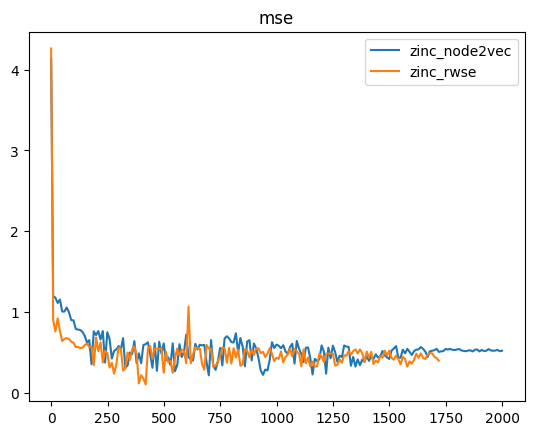

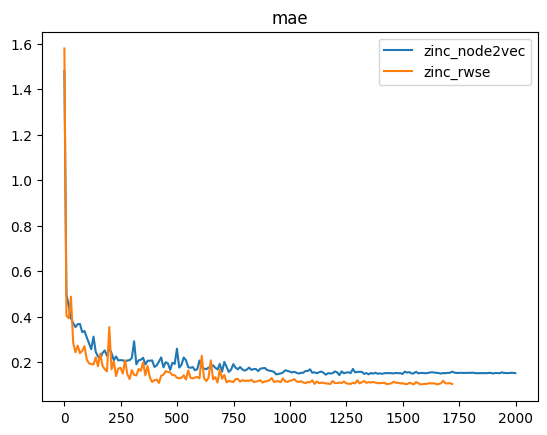

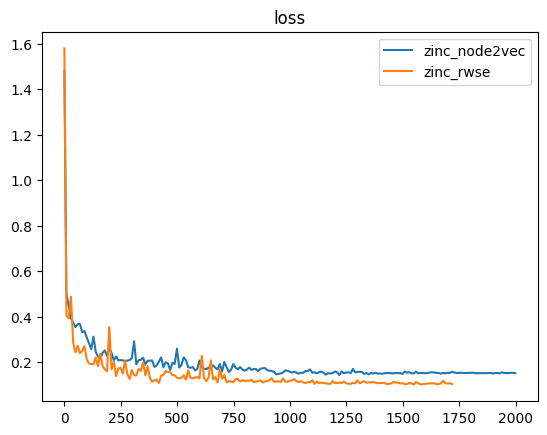

In [19]:
zinc_node2vec = "results/zinc-GPS+Node2Vec/0/val/stats.json"
zinc_rwse = "results/zinc-GPS+RWSE/0/val/stats.json"

res = {
    "zinc_node2vec": process_file(zinc_node2vec),
    "zinc_rwse": process_file(zinc_rwse), 
}

for title in ['mse', 'mae', 'loss']:
    plt.title(title)
    for key, item in res.items():
        plt.plot([x['epoch'] for x in item], [x[title] for x in item], label=key)

    plt.legend()
    plt.show()

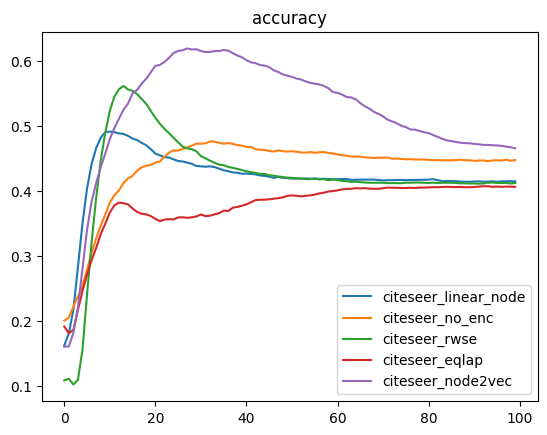

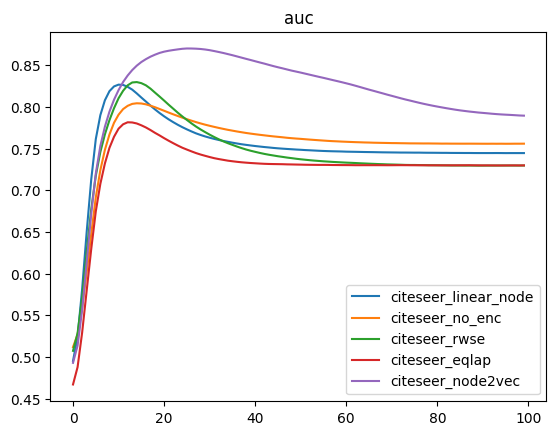

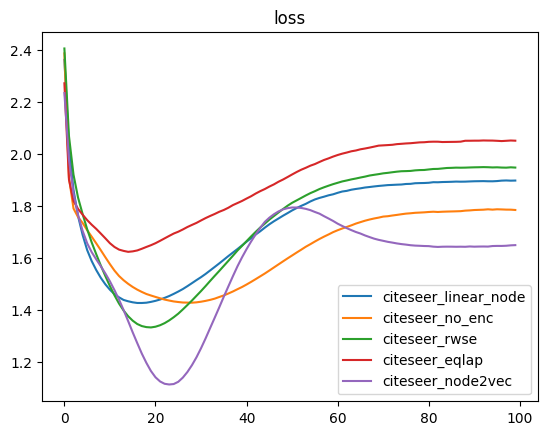

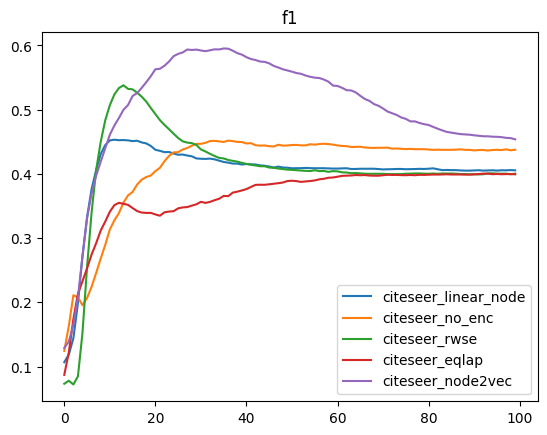

In [60]:
citeseer_linear_node = "results/citeseerLinearNode/0/val/stats.json"
citeseer_no_enc = "results/citeseerNoEnc/0/val/stats.json"
citeseer_rwse = 'results/citeseerRWSE/0/val/stats.json'
citeseer_eqlap = 'results/citeseerLapPE/0/val/stats.json'
citeseer_node2vec = 'results/citeseerNode2Vec/0/val/stats.json'

res = {
    "citeseer_linear_node": process_file(citeseer_linear_node),
    "citeseer_no_enc": process_file(citeseer_no_enc), 
    "citeseer_rwse": process_file(citeseer_rwse),
    "citeseer_eqlap": process_file(citeseer_eqlap),
    "citeseer_node2vec": process_file(citeseer_node2vec)
}
plot_res(res)

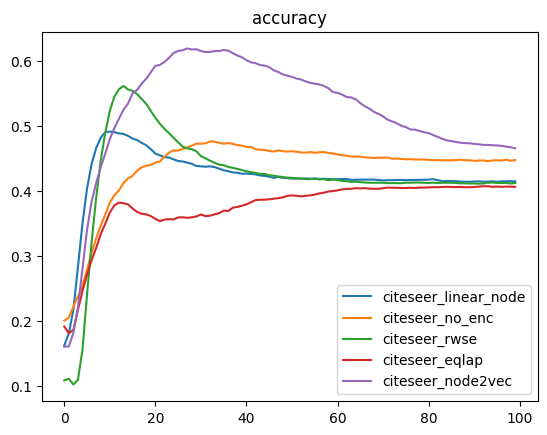

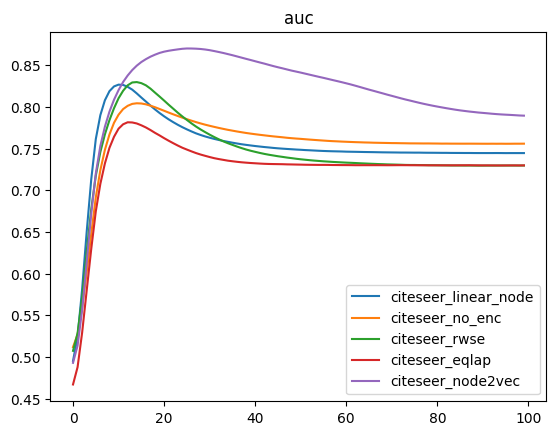

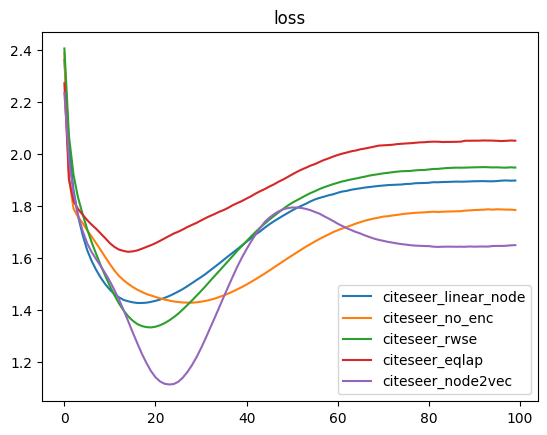

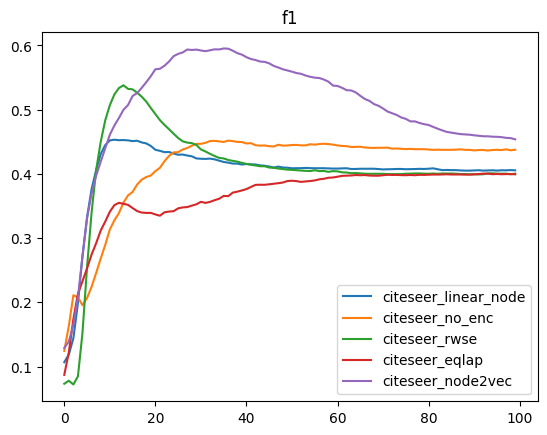

In [4]:
citeseer_linear_node = "results/citeseerLinearNode/0/test/stats.json"
citeseer_no_enc = "results/citeseerNoEnc/0/test/stats.json"
citeseer_rwse = 'results/citeseerRWSE/0/test/stats.json'
citeseer_eqlap = 'results/citeseerLapPE/0/test/stats.json'
citeseer_node2vec = 'results/citeseerNode2Vec/0/test/stats.json'

res = {
    "citeseer_linear_node": process_file(citeseer_linear_node),
    "citeseer_no_enc": process_file(citeseer_no_enc), 
    "citeseer_rwse": process_file(citeseer_rwse),
    "citeseer_eqlap": process_file(citeseer_eqlap),
    "citeseer_node2vec": process_file(citeseer_node2vec)
}
plot_res(res)

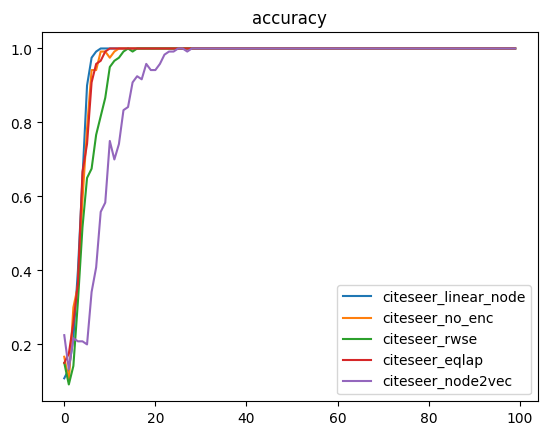

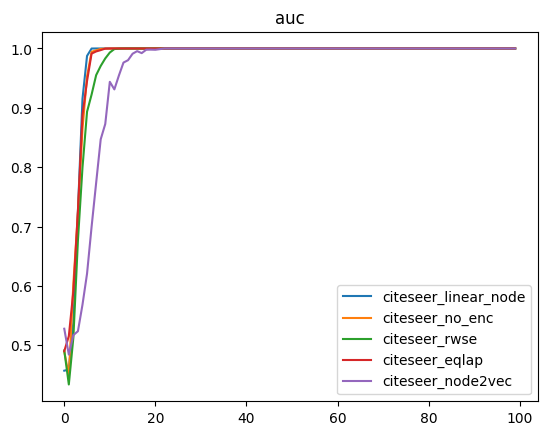

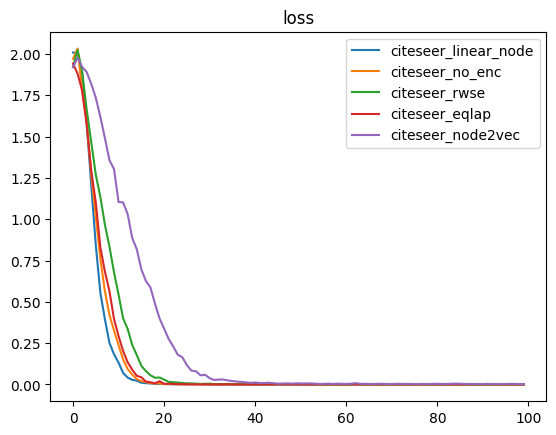

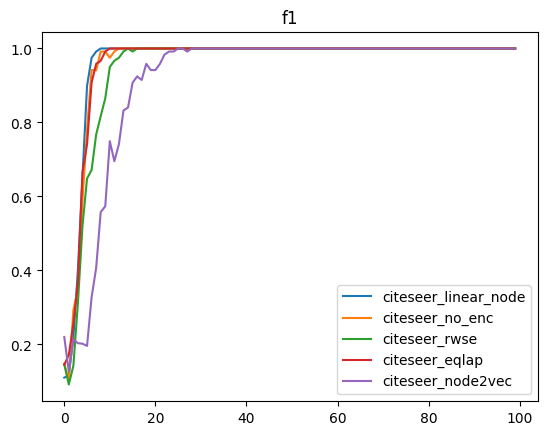

In [5]:
citeseer_linear_node = "results/citeseerLinearNode/0/train/stats.json"
citeseer_no_enc = "results/citeseerNoEnc/0/train/stats.json"
citeseer_rwse = 'results/citeseerRWSE/0/train/stats.json'
citeseer_eqlap = 'results/citeseerLapPE/0/train/stats.json'
citeseer_node2vec = 'results/citeseerNode2Vec/0/train/stats.json'

res = {
    "citeseer_linear_node": process_file(citeseer_linear_node),
    "citeseer_no_enc": process_file(citeseer_no_enc), 
    "citeseer_rwse": process_file(citeseer_rwse),
    "citeseer_eqlap": process_file(citeseer_eqlap),
    "citeseer_node2vec": process_file(citeseer_node2vec)
}
plot_res(res)

In [75]:
cora_linear_node = "results/coraLinearNode/1/val/stats.json"
cora_no_enc = "results/coraNoEnc/1/val/stats.json"
cora_rwse = 'results/coraRWSE/1/val/stats.json'
cora_eqlap = 'results/coraLapPE/1/val/stats.json'
cora_node2vec = 'results/coraNode2Vec/1/val/stats.json'
cora_node2vec_learnable = 'results/coraNode2VecLearnable/1/val/stats.json'

res = {
    "cora_linear_node": process_file(cora_linear_node),
    "cora_no_enc": process_file(cora_no_enc), 
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec),
    "cora_node2vec_learnable": process_file(cora_node2vec_learnable)
}

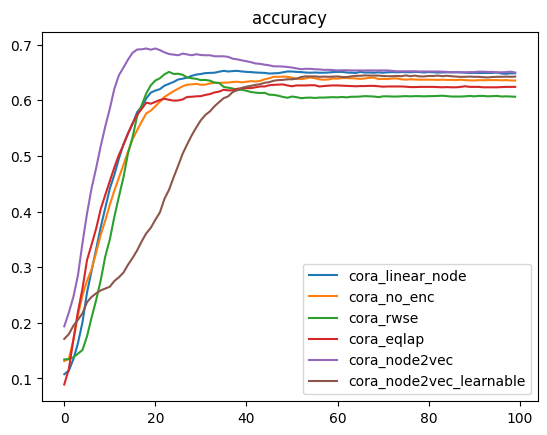

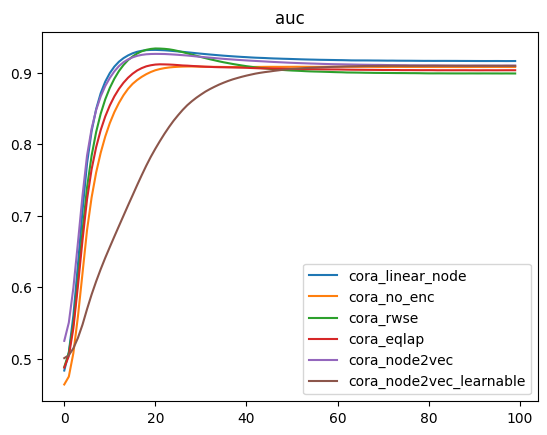

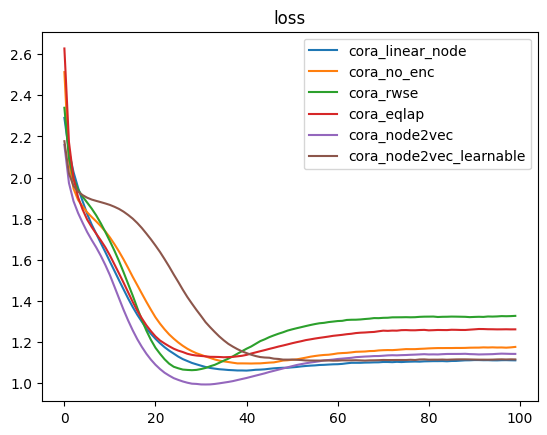

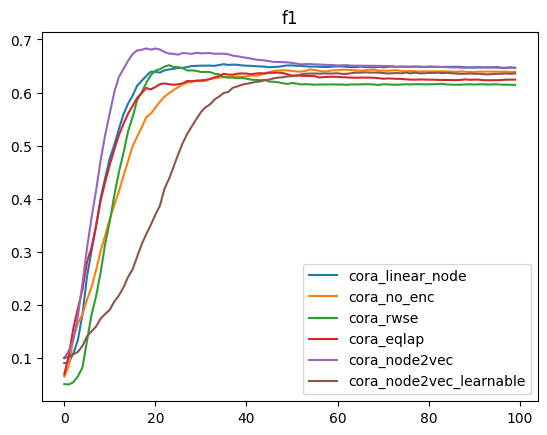

In [76]:
plot_res(res)

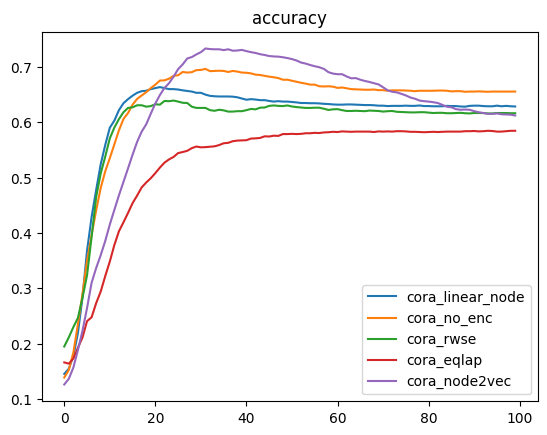

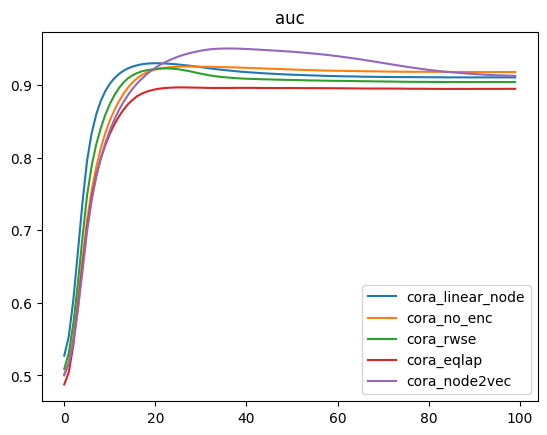

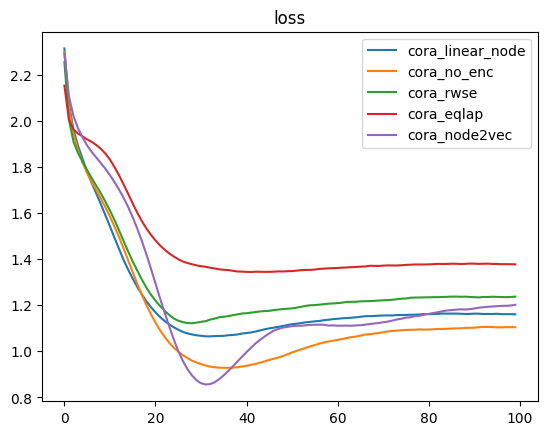

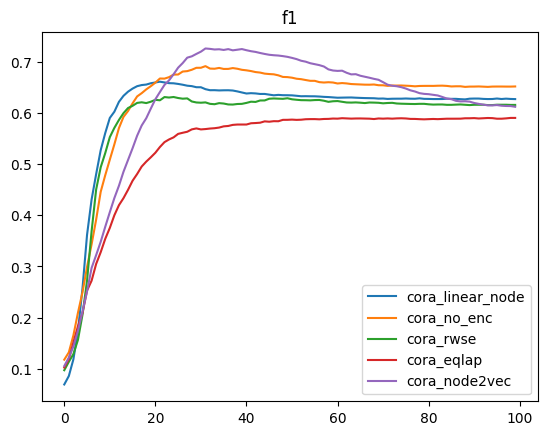

In [39]:
cora_linear_node = "results/coraLinearNode/0/test/stats.json"
cora_no_enc = "results/coraNoEnc/0/test/stats.json"
cora_rwse = 'results/coraRWSE/0/test/stats.json'
cora_eqlap = 'results/coraLapPE/0/test/stats.json'
cora_node2vec = 'results/coraNode2Vec/0/test/stats.json'

res = {
    "cora_linear_node": process_file(cora_linear_node),
    "cora_no_enc": process_file(cora_no_enc), 
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec)
}
plot_res(res)

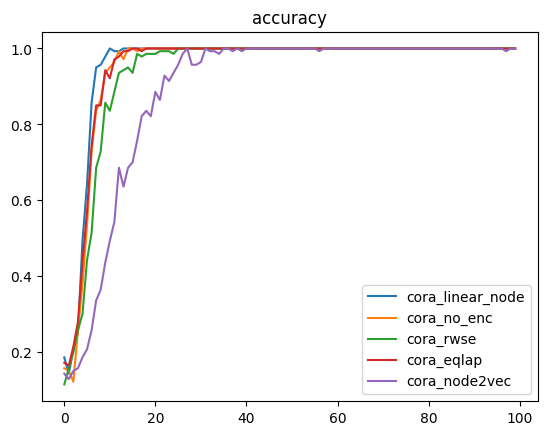

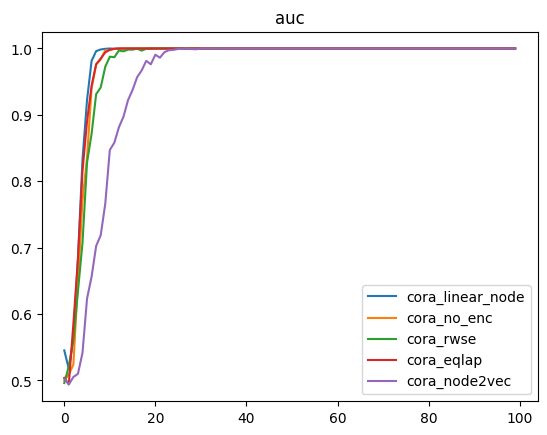

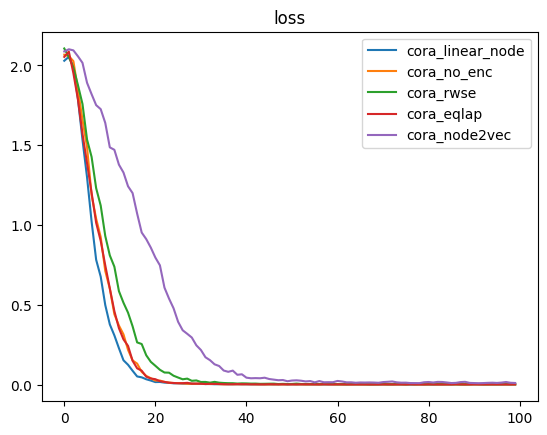

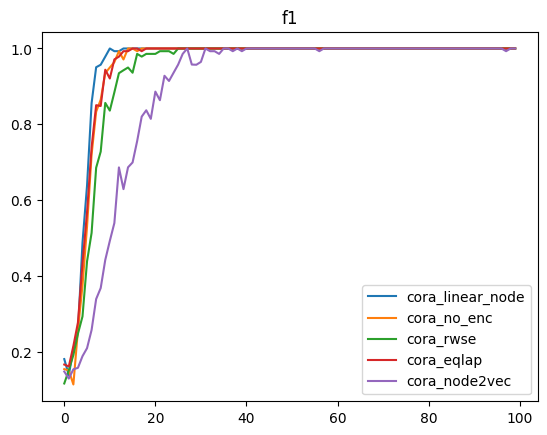

In [40]:
cora_linear_node = "results/coraLinearNode/0/train/stats.json"
cora_no_enc = "results/coraNoEnc/0/train/stats.json"
cora_rwse = 'results/coraRWSE/0/train/stats.json'
cora_eqlap = 'results/coraLapPE/0/train/stats.json'
cora_node2vec = 'results/coraNode2Vec/0/train/stats.json'

res = {
    "cora_linear_node": process_file(cora_linear_node),
    "cora_no_enc": process_file(cora_no_enc), 
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec)
}
plot_res(res)

In [32]:
cora = "results/cora/0/val/stats.json"
cora_rwse = 'results/coraRWSE/0/val/stats.json'
cora_eqlap = 'results/coraLapPE/0/val/stats.json'
cora_node2vec = 'results/coraNode2Vec/0/val/stats.json'

res = {
    "cora": process_file(cora),
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec)
}

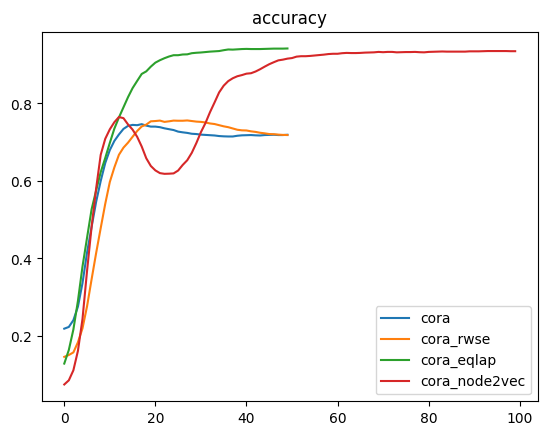

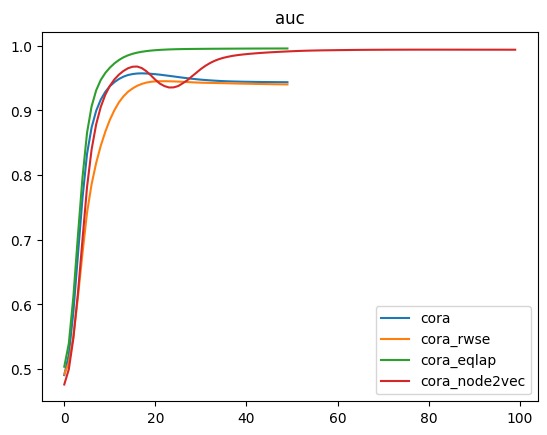

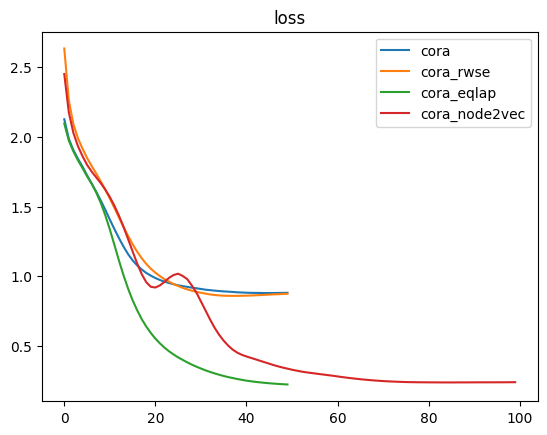

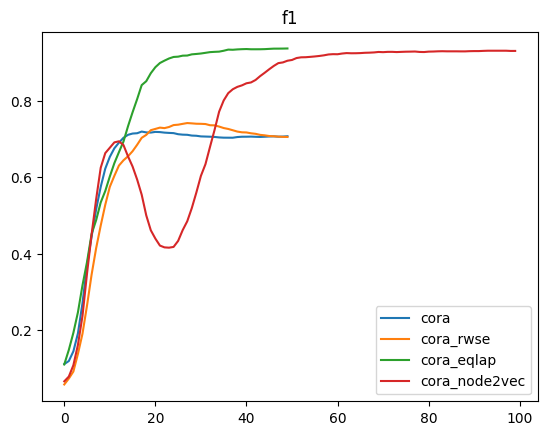

In [33]:
plot_res(res)

In [34]:
cora = "results/cora/0/test/stats.json"
cora_rwse = 'results/coraRWSE/0/test/stats.json'
cora_eqlap = 'results/coraLapPE/0/test/stats.json'
cora_node2vec = 'results/coraNode2Vec/0/test/stats.json'

res = {
    "cora": process_file(cora),
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec)
}

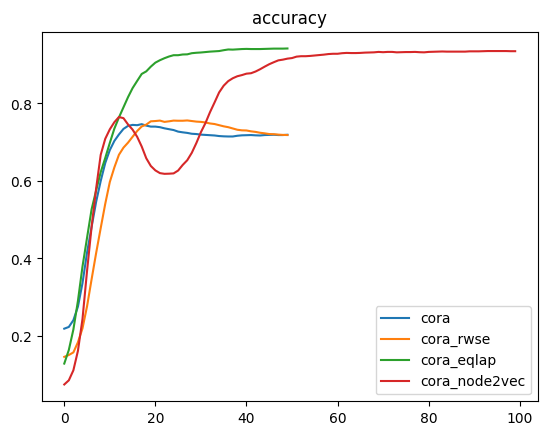

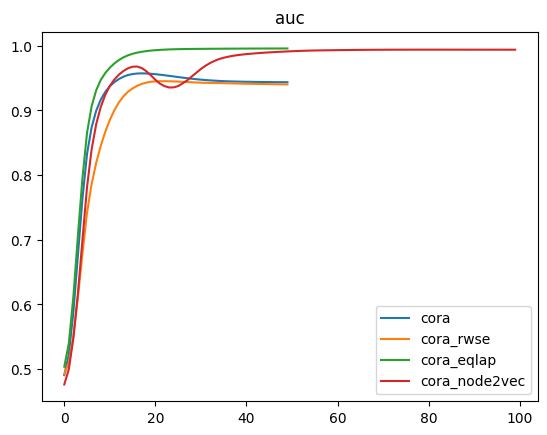

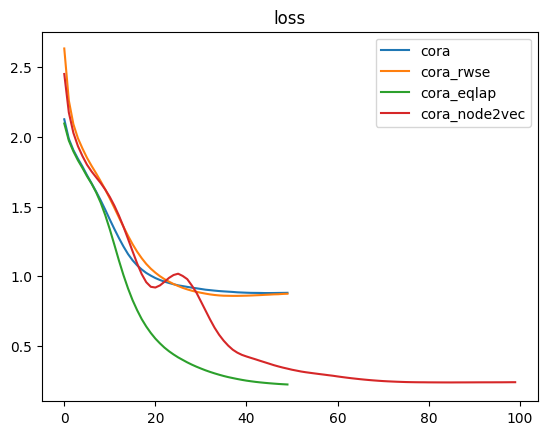

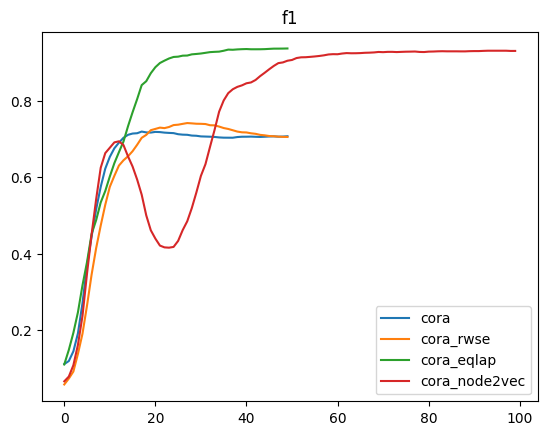

In [35]:
plot_res(res)

In [28]:
cora = "results/cora/0/train/stats.json"
cora_rwse = 'results/coraRWSE/0/train/stats.json'
cora_eqlap = 'results/coraLapPE/0/train/stats.json'
cora_node2vec = 'results/coraNode2Vec/0/train/stats.json'

res = {
    "cora": process_file(cora),
    "cora_rwse": process_file(cora_rwse),
    "cora_eqlap": process_file(cora_eqlap),
    "cora_node2vec": process_file(cora_node2vec)
}

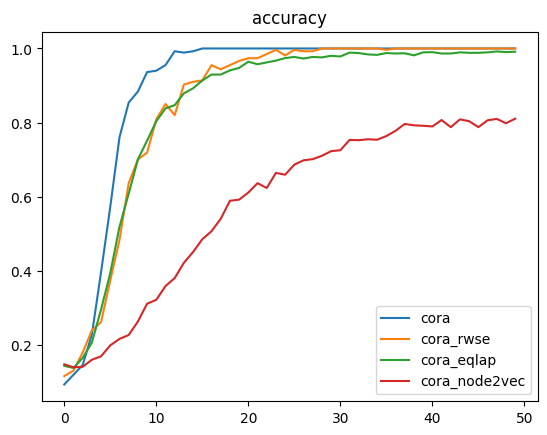

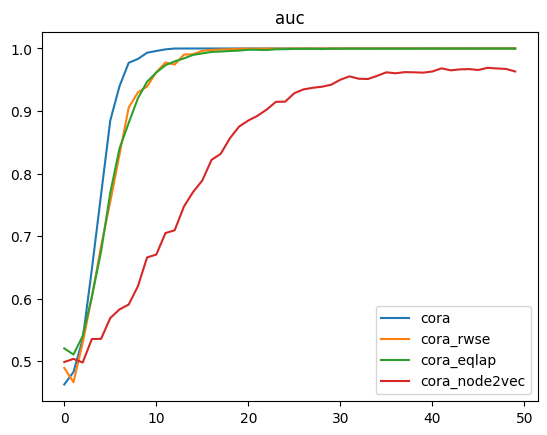

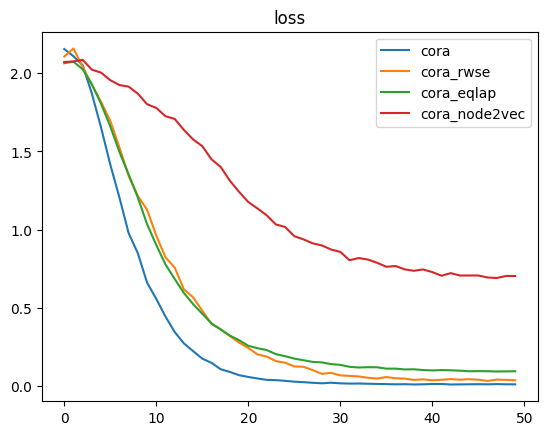

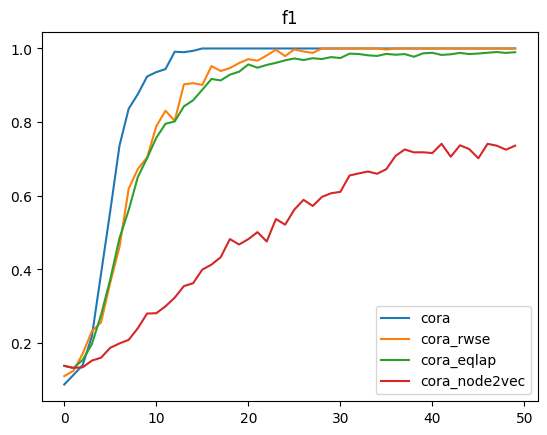

In [29]:
plot_res(res)